# Preliminary Data Analysis

In [2]:
import json
import numpy as np
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()

#load variable from .env file
ROOT_DIRECTORY = os.getenv("path_to_repo")

print(ROOT_DIRECTORY)

data_file = ROOT_DIRECTORY + '/data/Sarcasm_Headlines_Dataset.json'

def parse_json(fname):
    data = []
    with open(fname, 'r') as f:
        for line in f:
            data.append(json.loads(line))
    return data

data = parse_json(data_file)

df = pd.DataFrame(data)
df.head()

/Users/casperruegg/Documents/python_projects/ML_2024


,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


## Check the distribution of data

In [3]:
sarcastic_count = df.is_sarcastic.value_counts()
sarcastic_count

is_sarcastic
0    14985
1    13634
Name: count, dtype: int64

## Plotly graphs of headline length

In [4]:
import plotly.graph_objs as go
from plotly.offline import plot

df['headline_length'] = df['headline'].apply(len)
df['word count'] = df['headline'].apply(lambda x: len(x.split()))

average_length = df['headline_length'].mean()
average_word_count = df['word count'].mean()

print(f'Average length of headlines: {average_length:.2f}')
print(f'Average word count of headlines: {average_word_count:.2f}')

# make plot of average headline lenght for sarcastic and non-sarcastic headlines

sarcastic = df[df['is_sarcastic'] == 1]
non_sarcastic = df[df['is_sarcastic'] == 0]

# Determine the global minimum and maximum headline lengths to set consistent bins
global_min = min(min(sarcastic['headline_length']), min(non_sarcastic['headline_length']))
global_max = max(max(sarcastic['headline_length']), max(non_sarcastic['headline_length']))

# Define the bin size and edges
bin_size = (global_max - global_min) / 200
bin_edges = [global_min + x * bin_size for x in range(21)]

sarcastic_histogram = go.Histogram(
    x=sarcastic['headline_length'],
    opacity=0.5,
    name='Sarcastic',
    xbins=dict(
        start=global_min,
        end=global_max,
        size=bin_size
    )
)

non_sarcastic_histogram = go.Histogram(
    x=non_sarcastic['headline_length'],
    opacity=0.5,
    name='Non-sarcastic',
    xbins=dict(
        start=global_min,
        end=global_max,
        size=bin_size
    )
)

data = [sarcastic_histogram, non_sarcastic_histogram]

layout = go.Layout(
    title='Headline Length',
    xaxis=dict(title='Headline Length'),
    yaxis=dict(title='Count'),
    barmode='overlay',
    legend=dict(x=1, y=1, xanchor='right', yanchor='top')
)

fig = go.Figure(data=data, layout=layout)
fig.show()

Average length of headlines: 62.31
Average word count of headlines: 10.05


## Word cloud

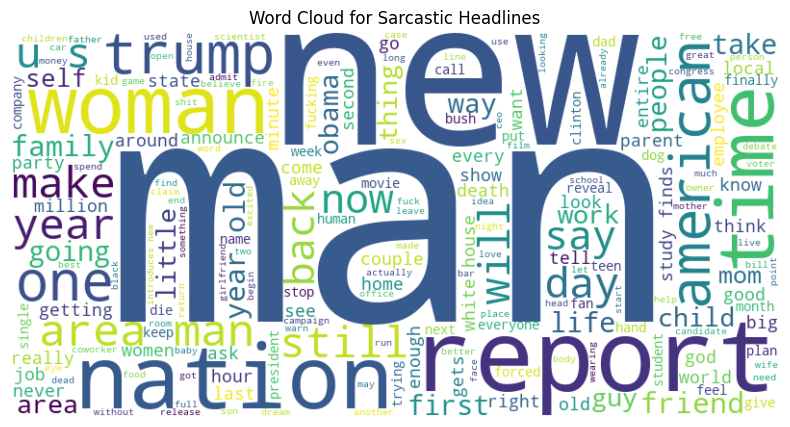

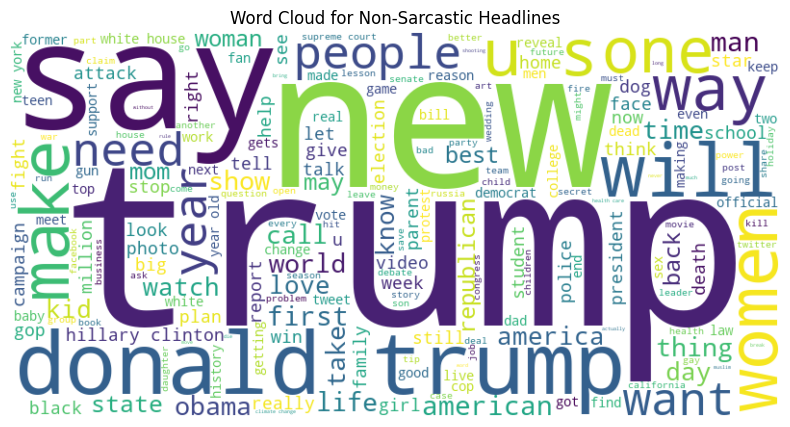

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud


# Word Cloud for Sarcastic Headlines
sarcastic_headlines = ' '.join(df[df['is_sarcastic'] == 1]['headline'])
wordcloud_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(sarcastic_headlines)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Sarcastic Headlines')
plt.show()

# Word Cloud for Non-Sarcastic Headlines
non_sarcastic_headlines = ' '.join(df[df['is_sarcastic'] == 0]['headline'])
wordcloud_non_sarcastic = WordCloud(width=800, height=400, background_color='white').generate(non_sarcastic_headlines)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Sarcastic Headlines')
plt.show()

In [12]:
## get the headlines that contain the word "Trump"

trump_headlines = df[df['headline'].str.contains('Trump', case=False)]
trump_headlines.head(5)

# 15, 38, 47, 58, 73
# get full headlines for the above indices

for i in [15, 38, 47, 58, 73]:
    print(df.iloc[i]['headline'])



uber ceo travis kalanick stepping down from trump economic advisory council
police say woman made up story of attack by two men, one wearing a trump hat (update)
texas republicans urge trump-style immigration crackdown
donald trump's latest attempt to repeal obamacare makes seth meyers sick
biting argument over trump may cost man his ear


In [27]:
## get the headlines that contain the word "man"

man_headlines = df[df['headline'].str.contains(' Man ', case=False)]
man_headlines.head(15)

# get headlines that contain the word man and are sarcastic

man_headlines_sarcastic = df[df['headline'].str.contains(' Man ', case=False) & (df['is_sarcastic'] == 1)]
man_headlines_sarcastic.head(5)

for i in [17, 203, 259, 262, 289]:
    headline = df.iloc[i]['headline']
    ## sarcastic = df.iloc[i]['is_sarcastic']
    print(f'{headline}')


area man does most of his traveling by gurney
area man feels even lazier when he thinks about how much isis has accomplished this year
strapping young man to address congress
area man too busy for his buddy phil, eh?
mysterious man in parking lot threatens to harm rudy giuliani if he ever blabs about trump's legal payments again


area man does most of his traveling by gurney, Sarcastic: 1
expansive obama state of the union speech to touch on patent law, entomology, the films of robert altman, Sarcastic: 1
naacp demands less minority representation on upn, Sarcastic: 1
egyptian woman wishes screaming protester husband would go bonkers for her once in a while, Sarcastic: 1
local man's fear of snakes increases with each snakebite, Sarcastic: 1
